# import basic library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set()

def display(w=16, h=5, dpi=200):
    plt.figure(figsize=(w, h), dpi=dpi)

# load data

In [3]:
data = pd.read_csv('IndexE8.csv')
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


# examine data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [5]:
data.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [6]:
data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


# visualize the data

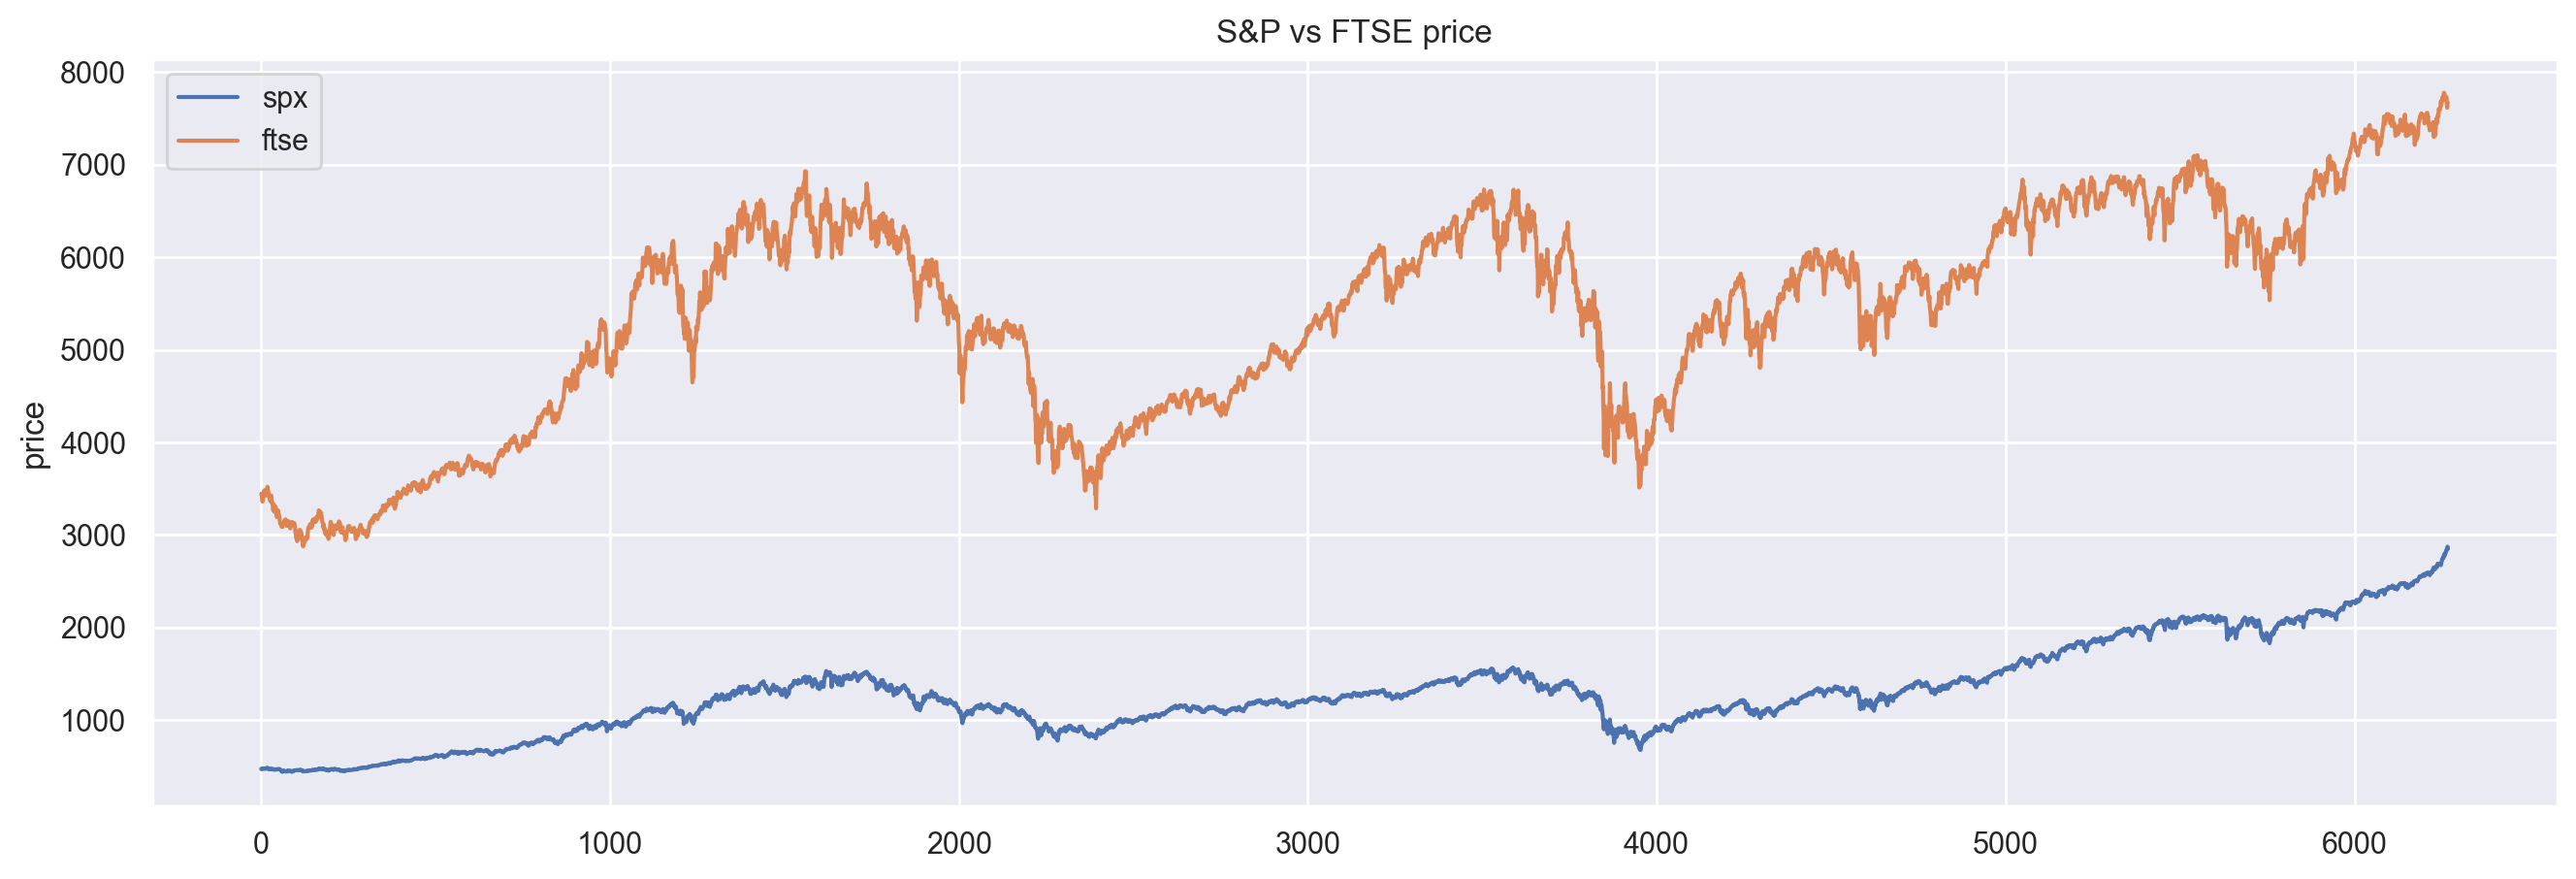

In [7]:
display()
data.spx.plot()
data.ftse.plot()
plt.title('S&P vs FTSE price')
plt.ylabel('price')
plt.legend()
plt.show()

In [8]:
import scipy.stats as stat

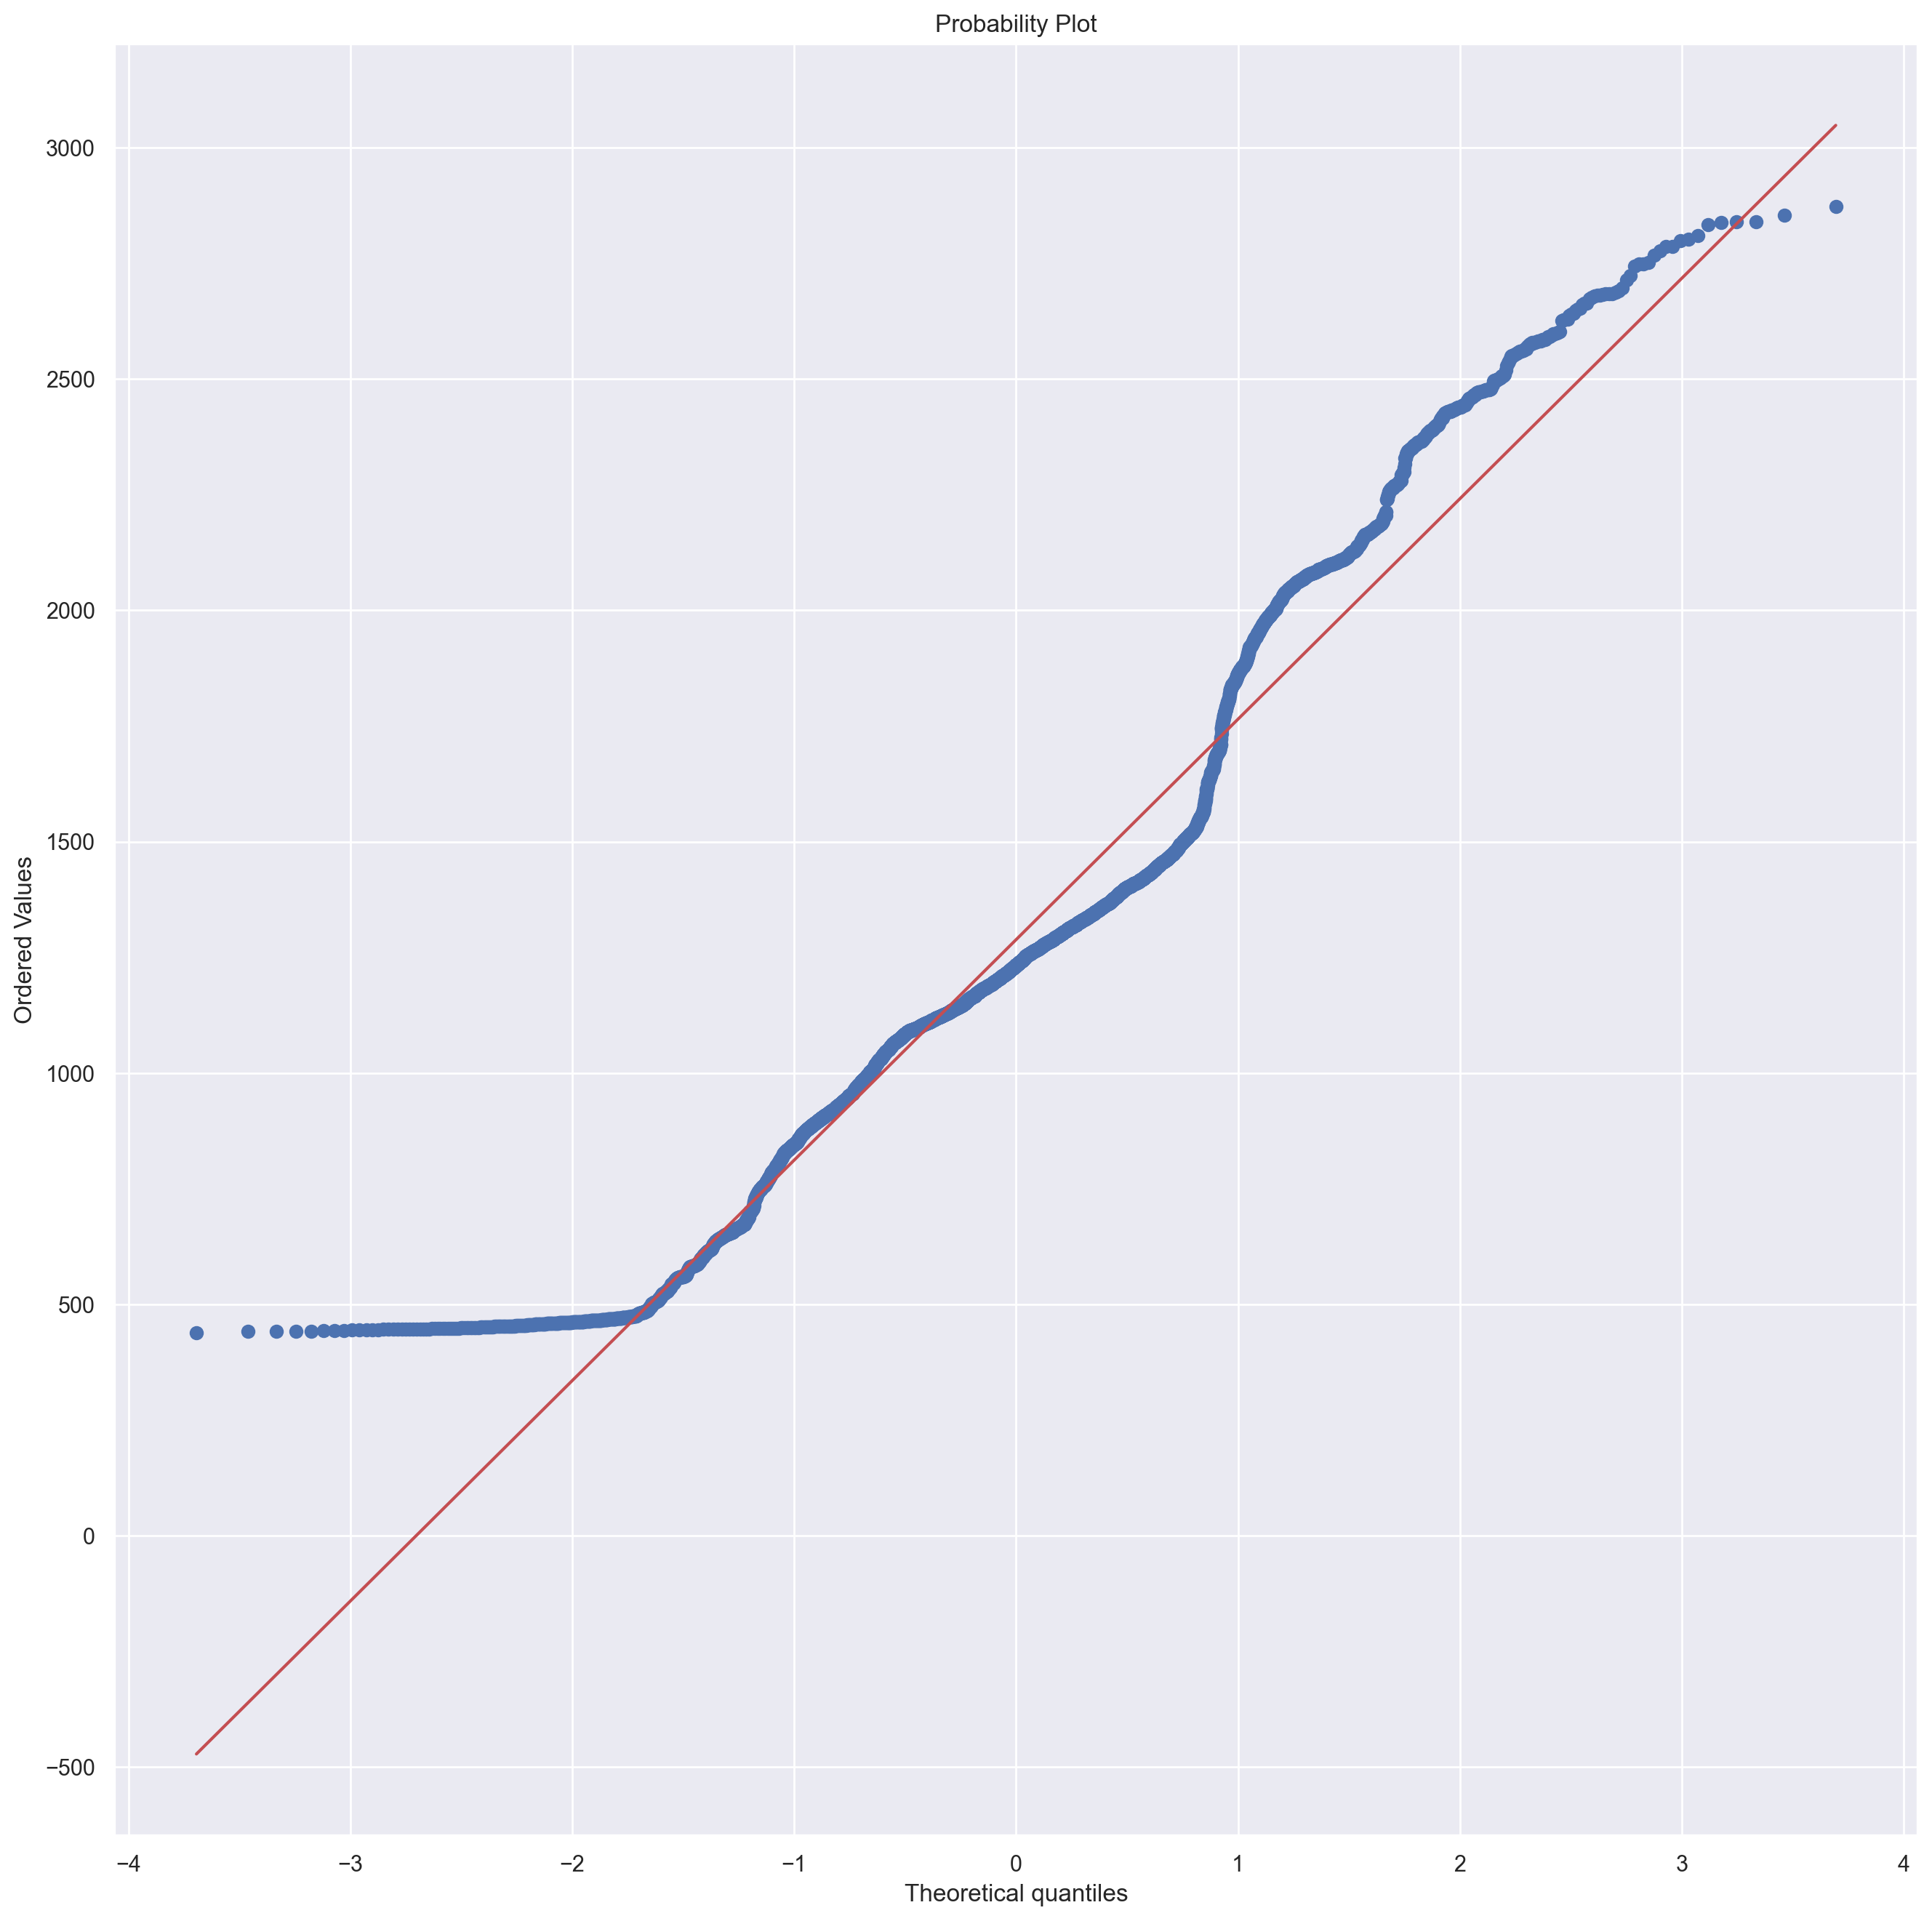

In [9]:
display(w=16,h=16)
stat.probplot(data.spx, plot=plt)
plt.show()

# preprocessing data

In [10]:
data.date = pd.to_datetime(arg=data.date, dayfirst=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [12]:
data = data.set_index('date')
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [13]:
data = data.asfreq('b')
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [14]:
data.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [15]:
data.spx = data.spx.fillna(method='ffill')
data.spx.isna().sum()

0

In [16]:
data.ftse = data.ftse.fillna(method='bfill')
data.ftse.isna().sum()

0

In [17]:
data.dax = data.dax.fillna(value=data.dax.mean())
data.dax.isna().sum()

0

In [18]:
data['market_value'] = data.ftse
data.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01


In [19]:
del data['spx'], data['dax'], data['ftse'], data['nikkei']

In [20]:
data.head()

,market_value
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


# splitting data

In [21]:
point = int(len(data)*0.8)
point

5021

In [22]:
data_train = data.iloc[:point]
data_test = data.iloc[point:]
data_train.shape, data_test.shape

((5021, 1), (1256, 1))

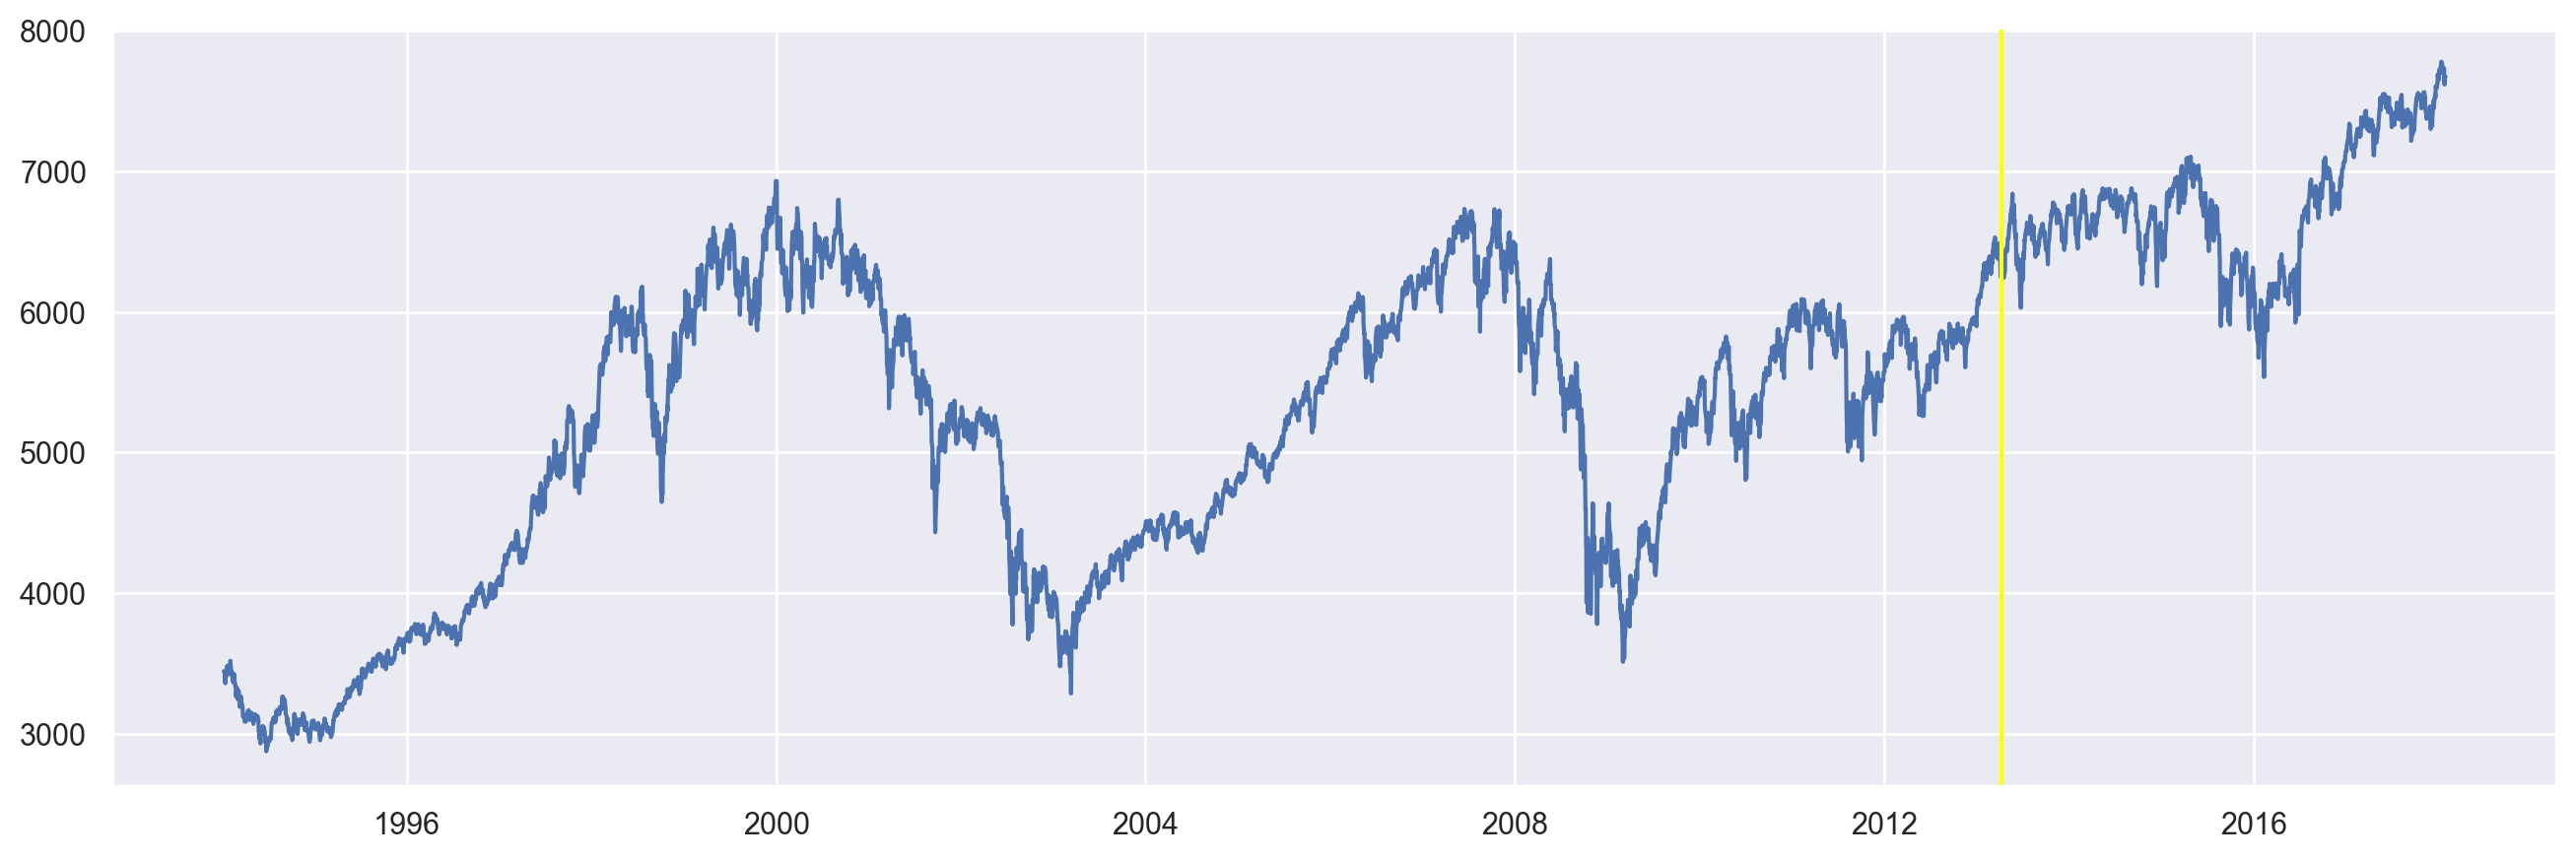

In [23]:
display()
plt.plot(data.market_value)
plt.axvline(x=data.index[point], color='yellow')
plt.show()

# white noise

In [24]:
white_noise = np.random.normal(loc=data_train.market_value.mean(), 
                               scale=data_train.market_value.std(),
                               size=len(data_train))

In [25]:
data_train['white_noise'] = white_noise
data_train.head()

C:\Users\yandiher\AppData\Local\Temp\ipykernel_4880\917661762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['white_noise'] = white_noise


,market_value,white_noise
date,,
1994-01-07,3445.98,4598.917697
1994-01-10,3440.58,3811.710205
1994-01-11,3413.77,5279.548363
1994-01-12,3372.02,5405.429918
1994-01-13,3360.01,4050.941623


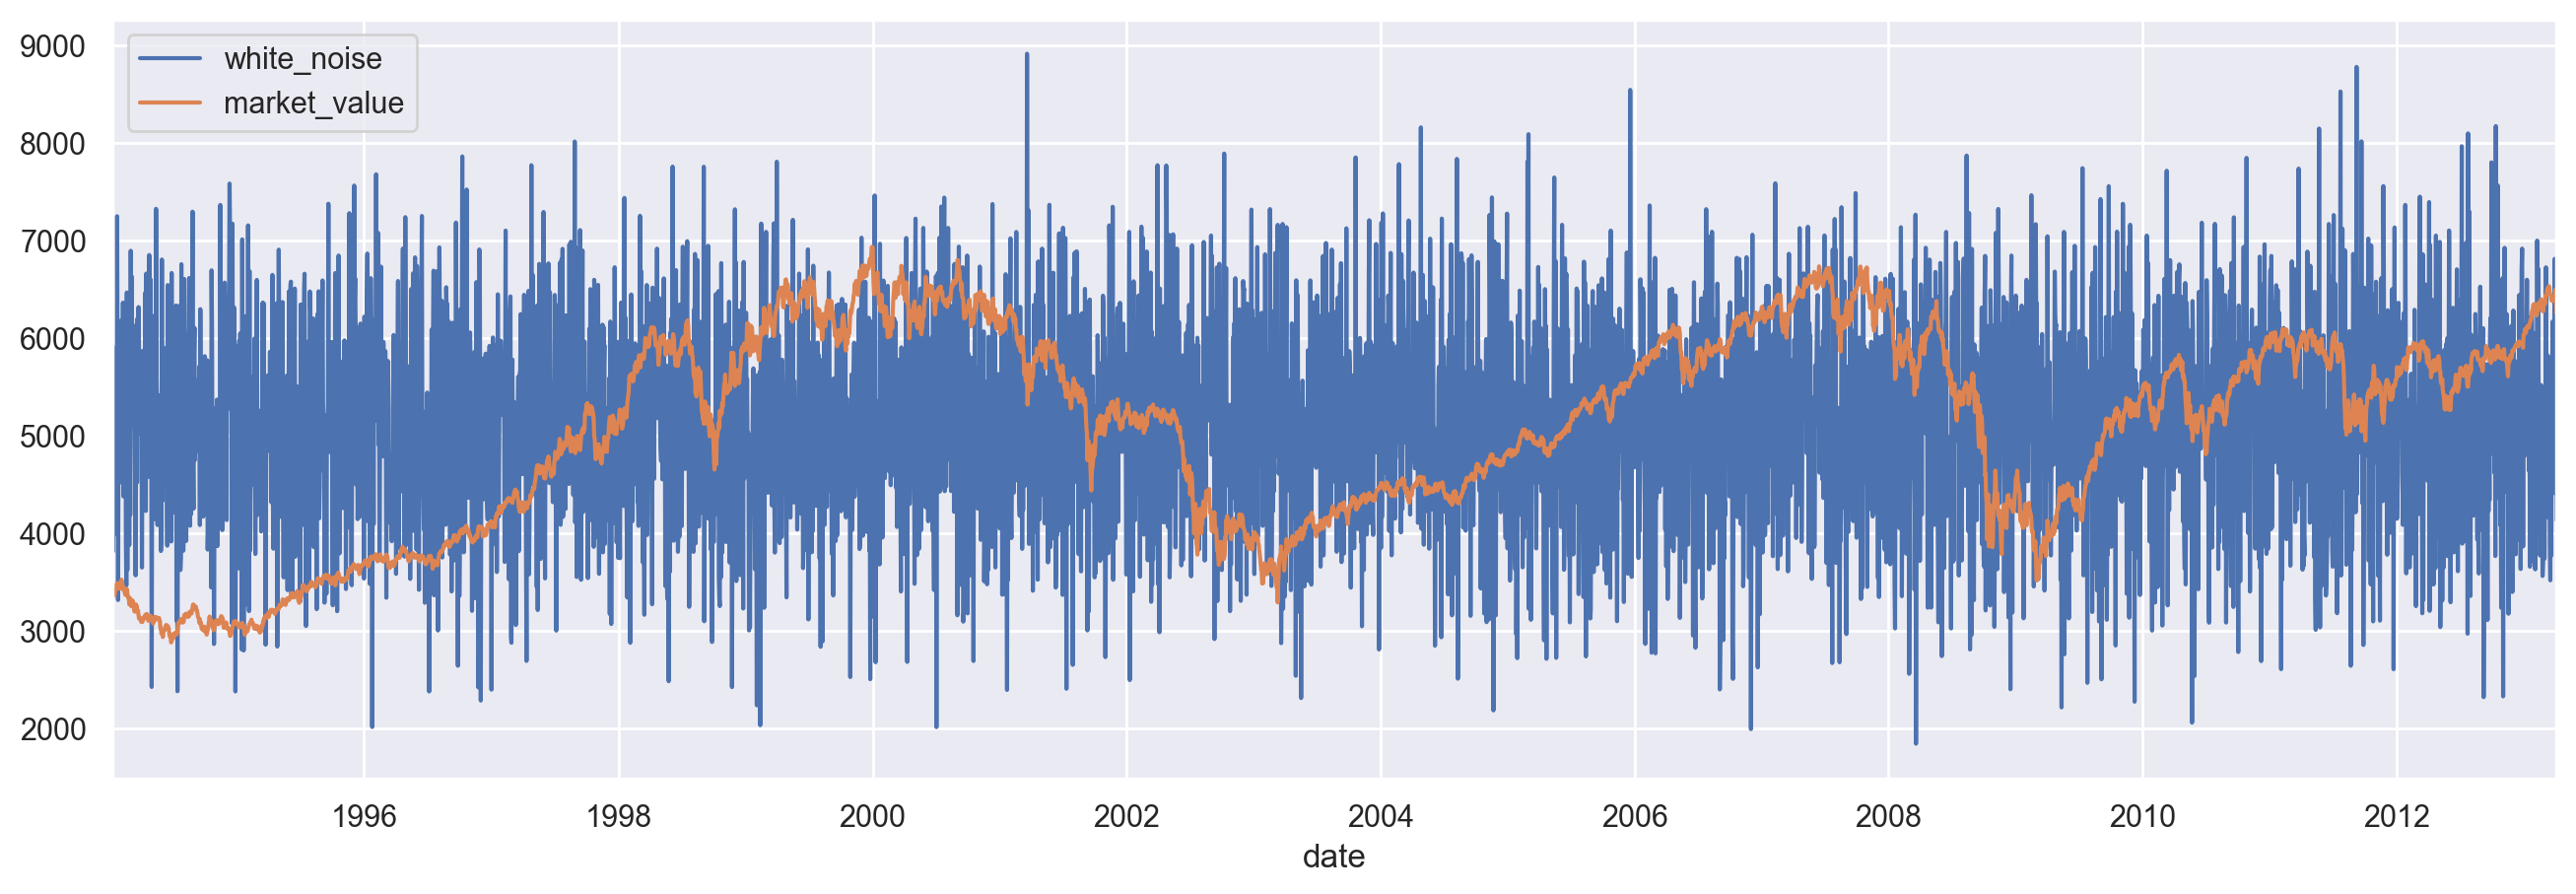

In [26]:
display()
data_train.white_noise.plot()
data_train.market_value.plot()
plt.legend()
plt.show()

# random walk

In [27]:
random_walk = pd.read_csv('RandWalk.csv')
random_walk.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [28]:
random_walk.date = pd.to_datetime(random_walk.date, dayfirst=True)
random_walk = random_walk.set_index('date')
random_walk = random_walk.asfreq('b')
random_walk.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [29]:
random_walk.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [30]:
data_train['random_walk'] = random_walk.price
data_train.head()

C:\Users\yandiher\AppData\Local\Temp\ipykernel_4880\3636145406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['random_walk'] = random_walk.price


,market_value,white_noise,random_walk
date,,,
1994-01-07,3445.98,4598.917697,1122.139662
1994-01-10,3440.58,3811.710205,1080.347860
1994-01-11,3413.77,5279.548363,1082.095245
1994-01-12,3372.02,5405.429918,1083.639265
1994-01-13,3360.01,4050.941623,1067.146255


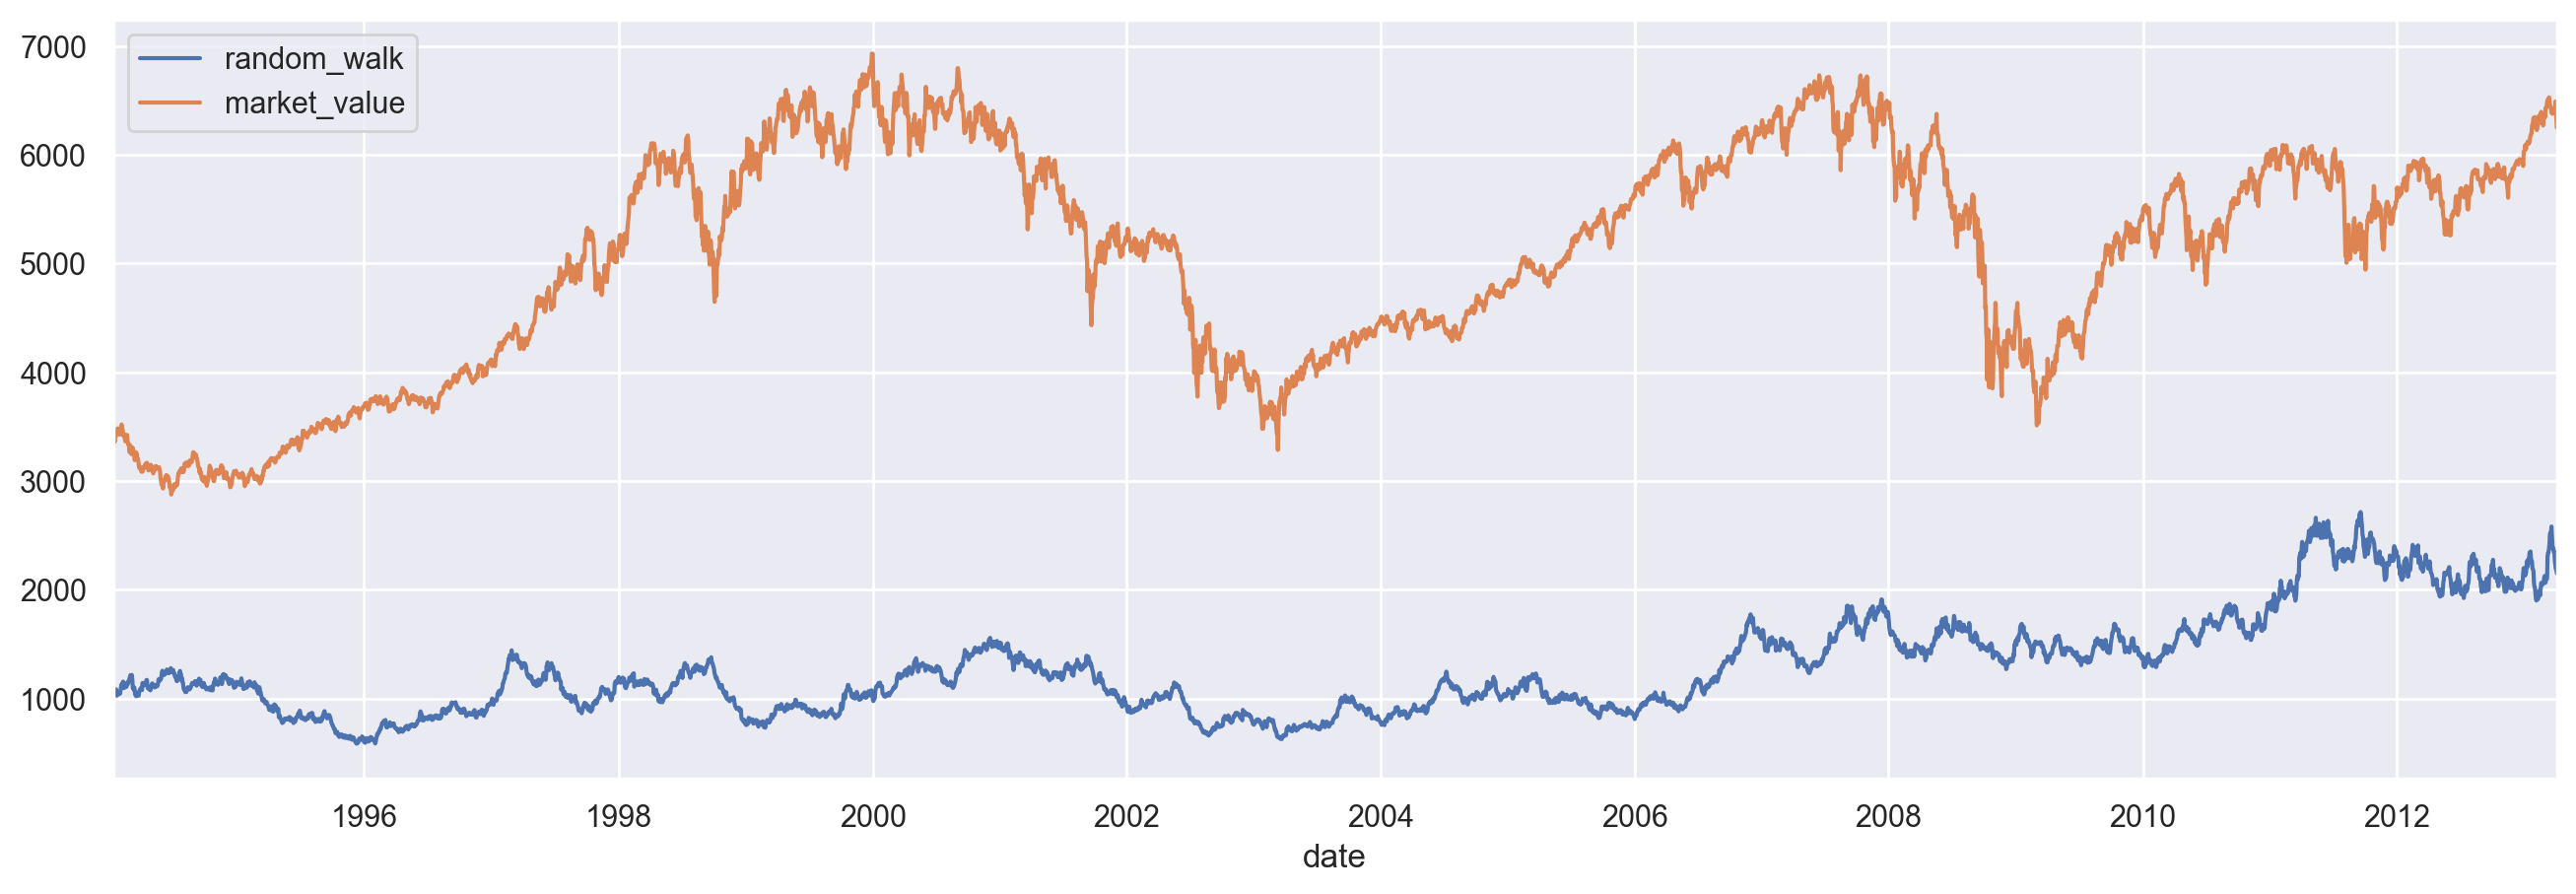

In [31]:
display()
data_train.random_walk.plot()
data_train.market_value.plot()
plt.legend()
plt.show()

# stationarity

In [32]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
sts.adfuller(data_train.market_value)

(-1.904935638502626,
 0.32974280493188823,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54856.46568853504)

In [34]:
sts.adfuller(data_train.white_noise)

(-71.99728681042762,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 83196.61863114135)

In [35]:
sts.adfuller(data_train.random_walk)

(-1.3286073927689714,
 0.6159849181617386,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

# seasonality

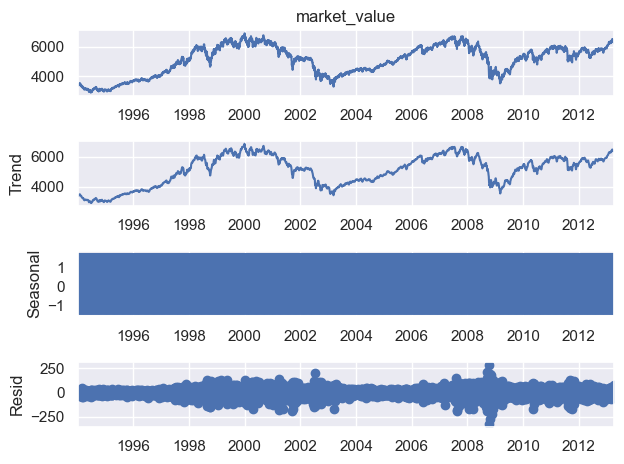

In [36]:
dec_additive = seasonal_decompose(data_train.market_value, model='additive')
dec_additive.plot()
plt.show()

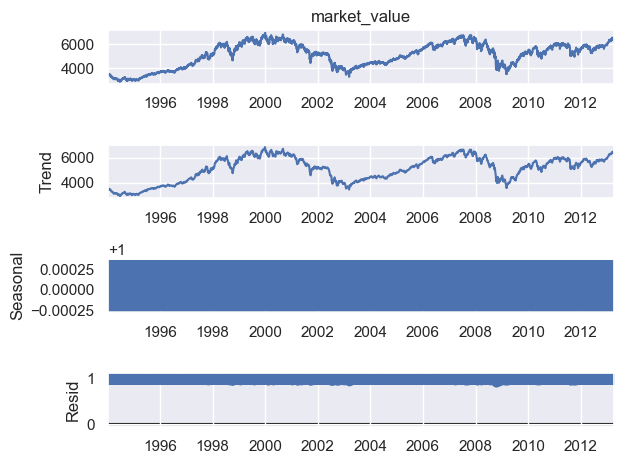

In [37]:
dec_additive = seasonal_decompose(data_train.market_value, model='multiplicative')
dec_additive.plot()
plt.show()

# auto correlation function

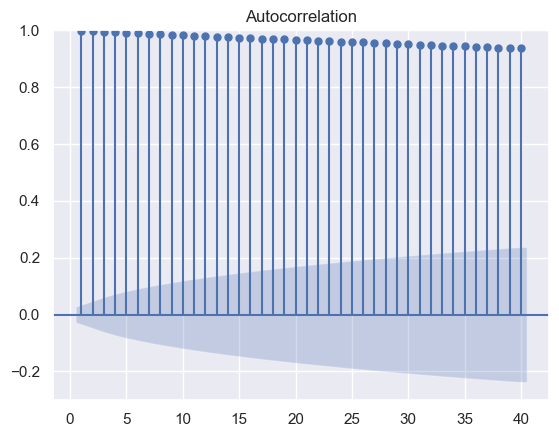

In [38]:
sgt.plot_acf(data_train.market_value, lags=40, zero=False)
plt.ylim(-0.3, 1)
plt.show()

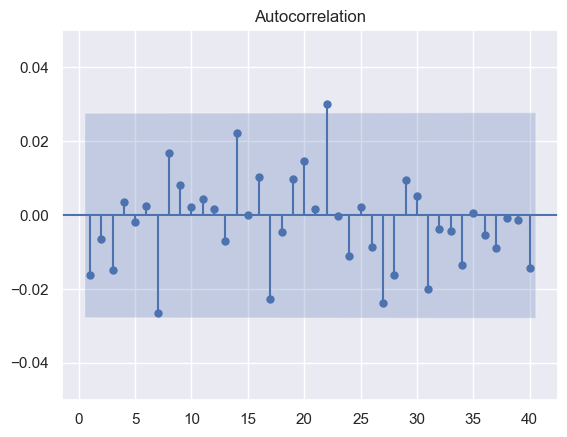

In [39]:
sgt.plot_acf(data_train.white_noise, lags=40, zero=False)
plt.ylim(-0.05, 0.05)
plt.show()

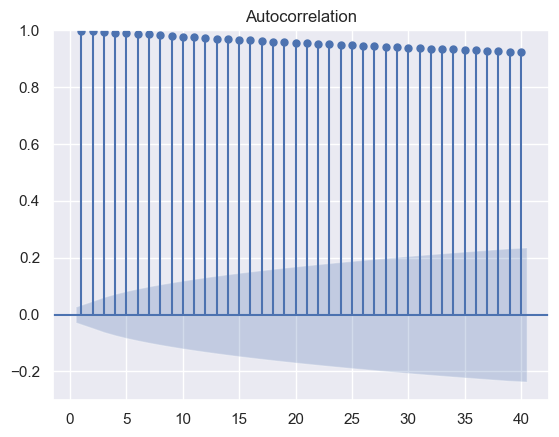

In [40]:
sgt.plot_acf(data_train.random_walk, lags=40, zero=False)
plt.ylim(-0.3, 1)
plt.show()

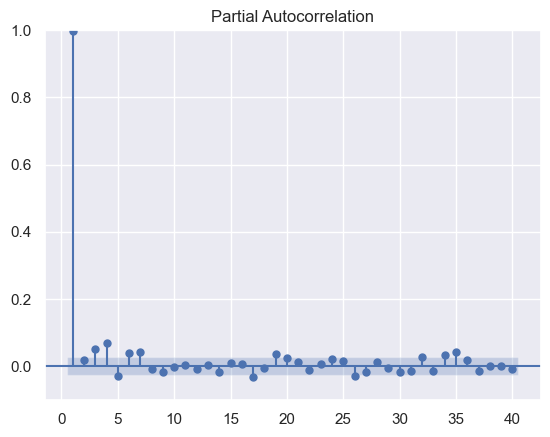

In [41]:
sgt.plot_pacf(data_train.market_value, lags=40, zero=False, method='ols')
plt.ylim(-0.1, 1)
plt.show()

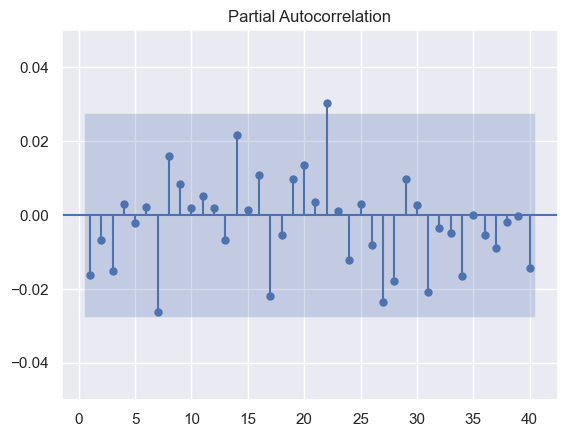

In [42]:
sgt.plot_pacf(data_train.white_noise, lags=40, zero=False, method='ols')
plt.ylim(-0.05, 0.05)
plt.show()

# auto regression

In [43]:
from statsmodels.tsa.api import ARIMA
from scipy.stats.distributions import chi2

In [44]:
model_arima = ARIMA(data_train.market_value)

In [45]:
result = model_arima.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                          ARIMA   Log Likelihood              -41893.031
Date:                Fri, 23 Jun 2023   AIC                          83790.063
Time:                        13:58:15   BIC                          83803.106
Sample:                    01-07-1994   HQIC                         83794.633
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.7690     15.721    323.748      0.000    5058.956    5120.582
sigma2      1.036e+06   3.11e+04     33.348      0.000    9.75e+05     1.1e+06
Ljung-Box (L1) (Q):                5003.04   Jarque-